In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
import xgboost as xgb
from sklearn.model_selection import train_test_split,GridSearchCV
import random

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
sS = pd.read_csv("sampleSubmission.csv")

In [3]:
select_label = [0, 1, 2, 3]
select_habits = [0., 1.]

In [4]:
train['推薦類型'].replace(['肌力',"柔軟度","心肺","肌耐力"],[0,1,2,3] , inplace = True)
train = train[train['推薦類型'].isin(select_label)]

In [5]:
train = train[train['拳擊'].isin(select_habits)]
train = train[train['器材'].isin(select_habits)]
train = train[train['有氧'].isin(select_habits)]
train = train[train['舞蹈'].isin(select_habits)]
train = train[train['高強度間歇'].isin(select_habits)]
train = train[train['瑜伽'].isin(select_habits)]
train = train[train['肌力訓練'].isin(select_habits)]
train = train[train['燃脂'].isin(select_habits)]
train = train[train['減脂瘦身'].isin(select_habits)]
train = train[train['增加肌肉'].isin(select_habits)]
train = train[train['增強體魄'].isin(select_habits)]
train = train[train['舒緩壓力'].isin(select_habits)]

In [6]:
train = train[train['年齡']<70]
train = train[train['BMI']>10]

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3425 entries, 5 to 26416
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   性別      3425 non-null   float64
 1   年齡      3425 non-null   float64
 2   BMI     3425 non-null   float64
 3   拳擊      3425 non-null   float64
 4   器材      3425 non-null   float64
 5   有氧      3425 non-null   float64
 6   舞蹈      3425 non-null   float64
 7   高強度間歇   3425 non-null   float64
 8   瑜伽      3425 non-null   float64
 9   肌力訓練    3425 non-null   float64
 10  燃脂      3425 non-null   float64
 11  減脂瘦身    3425 non-null   float64
 12  增加肌肉    3425 non-null   float64
 13  增強體魄    3425 non-null   float64
 14  舒緩壓力    3425 non-null   float64
 15  推薦類型    3425 non-null   object 
dtypes: float64(15), object(1)
memory usage: 454.9+ KB


In [8]:
train['拳擊'] = train['拳擊'].astype(int)
train['器材'] = train['器材'].astype(int)
train['有氧'] = train['有氧'].astype(int)
train['舞蹈'] = train['舞蹈'].astype(int)
train['高強度間歇'] = train['高強度間歇'].astype(int)
train['肌力訓練'] = train['肌力訓練'].astype(int)
train['瑜伽'] = train['瑜伽'].astype(int)
train['燃脂'] = train['燃脂'].astype(int)
train['減脂瘦身'] = train['減脂瘦身'].astype(int)
train['增加肌肉'] = train['增加肌肉'].astype(int)
train['增強體魄'] = train['增強體魄'].astype(int)
train['舒緩壓力'] = train['舒緩壓力'].astype(int)
train["性別"] = train["性別"].astype(int)
train['推薦類型'] = train['推薦類型'].astype(int)
train

,性別,年齡,BMI,拳擊,器材,有氧,舞蹈,高強度間歇,瑜伽,肌力訓練,燃脂,減脂瘦身,增加肌肉,增強體魄,舒緩壓力,推薦類型
5,1,47.0,22.521372,0,0,1,1,1,1,0,1,1,1,1,1,0
10,1,46.0,23.161083,1,1,1,0,1,0,1,1,0,1,0,1,0
12,1,43.0,22.053277,0,1,1,1,1,0,0,0,1,1,1,1,1
33,1,38.0,19.310658,0,1,1,1,0,0,1,0,1,0,1,1,0
43,1,45.0,20.259939,1,1,1,1,1,1,1,1,0,1,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26391,0,46.0,21.589910,1,1,1,1,0,1,1,1,1,1,0,1,0
26403,1,46.0,22.491349,0,0,1,0,1,1,1,1,0,1,1,0,0
26411,0,45.0,22.157158,0,1,0,1,1,0,0,1,0,1,1,0,1
26414,1,26.0,14.634752,1,0,0,0,0,0,0,0,0,0,0,1,2


In [9]:
'''T =23
D =22
out = train.query("@T> BMI > @D ")
outlist = out.index.tolist()
outlist = random.sample(outlist,150)
train = train.drop(outlist)

train'''

'T =23\nD =22\nout = train.query("@T> BMI > @D ")\noutlist = out.index.tolist()\noutlist = random.sample(outlist,150)\ntrain = train.drop(outlist)\n\ntrain'

In [10]:
X = train.drop(["推薦類型"], axis =1)
y = train["推薦類型"]

In [11]:
X["BMI"].value_counts()

22.491349    307
19.879103    127
23.875115     80
18.818924     71
16.358025     63
            ... 
23.143572      1
17.088284      1
14.015922      1
17.775502      1
14.634752      1
Name: BMI, Length: 2535, dtype: int64

In [12]:
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
import xgboost as xgb
from sklearn.model_selection import train_test_split,GridSearchCV

0    1112
1    1112
2    1112
3    1112
Name: 推薦類型, dtype: int64

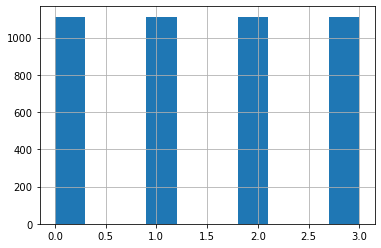

In [13]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
X_s, y_s = TomekLinks().fit_resample(X, y)
X_s, y_s = SMOTE(random_state = 0).fit_resample(X_s,y_s)

y_s.hist()
y_s.value_counts()

In [14]:
X_s["BMI"].value_counts()

22.491349    326
23.875115    309
19.879103    154
16.358025     76
18.818924     65
            ... 
16.781371      1
21.298631      1
25.646778      1
22.774694      1
13.714542      1
Name: BMI, Length: 3298, dtype: int64

In [15]:
train = pd.concat([X_s,y_s],axis =1)

In [16]:
for i in range(1,24):
    out = train.query("@i+1> BMI > @i ")
    if len(out) >200:
        outlist = out.index.tolist()
        outlist = random.sample(outlist,100)
        train = train.drop(outlist)
        

In [17]:
X_s = train.drop(["推薦類型"], axis =1)
y_s = train["推薦類型"]

<AxesSubplot:>

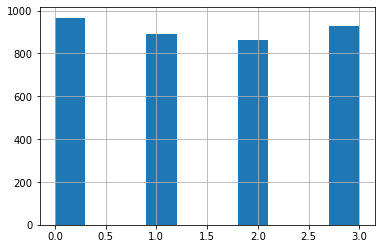

In [18]:
y_s.hist()

In [19]:
from sklearn.ensemble import RandomForestClassifier
X_train, X_val, y_train, y_val = train_test_split(
   X_s, y_s, test_size=0.33, random_state=42)

In [20]:
randomForestModel = RandomForestClassifier(random_state = 42, n_estimators= 400)
randomForestModel.fit(X_train,y_train)
randomForestModel.score(X_val,y_val)

0.877906976744186

In [21]:
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC


def accuracy_score(y_val,y_pred):
    Sum = 0
    y_val = y_val.tolist()
    y_pred = y_pred.tolist()
    for i in range(len(y_pred)):
        if y_val[i] == y_pred[i]:
            Sum+=1
    score = Sum/len(y_pred)
    
    return score


rnd_clf = RandomForestClassifier(random_state=42,n_estimators=400)
xgb_clf =  XGBClassifier(random_state=42, n_estimators=400, max_depth = 12,learning_rate =0.15)

voting_clf = VotingClassifier(estimators=[('xg', xgb_clf), ('rf', rnd_clf)],voting='hard')
scores_1 = cross_val_score(rnd_clf,X_s,y_s,cv = 3,scoring = 'accuracy')
scores_2 = cross_val_score(xgb_clf,X_s,y_s,cv = 3,scoring = 'accuracy')
scores = cross_val_score(voting_clf,X_s,y_s,cv = 3,scoring = 'accuracy')
print("rnd: "+str(scores_1.mean()))
print(" xgb: "+str(scores_2.mean()))
print(" vote: "+str(scores.mean()))

C:\Users\KYLE\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:31:51] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\KYLE\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:31:53] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\KYLE\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:31:55] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\KYLE\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:31:58] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\KYLE\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:32:01] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\KYLE\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:32:04] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
rnd: 0.8675986842105262
 xgb: 0.8555372807017544
 vote: 0.8621162280701755


In [22]:
voting_clf.fit(X_s,y_s)
y_pred = voting_clf.predict(test)
y_pred_pd = pd.DataFrame(data = y_pred, columns = ["label"])
y_pred_pd = y_pred_pd.astype('int64').reset_index()
y_pred_pd
y_pred_pd.to_csv("e94084032.csv", index = False)

[11:32:07] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\KYLE\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [23]:
#df = train[train['closing_price'].between(, 101)]

In [24]:
train["BMI"].value_counts()

22.491349    289
23.875115    276
19.879103    123
16.358025     55
18.818924     33
            ... 
19.673730      1
23.767454      1
23.058764      1
23.007161      1
13.714542      1
Name: BMI, Length: 2718, dtype: int64

In [25]:
#

In [26]:
X

,性別,年齡,BMI,拳擊,器材,有氧,舞蹈,高強度間歇,瑜伽,肌力訓練,燃脂,減脂瘦身,增加肌肉,增強體魄,舒緩壓力
5,1,47.0,22.521372,0,0,1,1,1,1,0,1,1,1,1,1
10,1,46.0,23.161083,1,1,1,0,1,0,1,1,0,1,0,1
12,1,43.0,22.053277,0,1,1,1,1,0,0,0,1,1,1,1
33,1,38.0,19.310658,0,1,1,1,0,0,1,0,1,0,1,1
43,1,45.0,20.259939,1,1,1,1,1,1,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26391,0,46.0,21.589910,1,1,1,1,0,1,1,1,1,1,0,1
26403,1,46.0,22.491349,0,0,1,0,1,1,1,1,0,1,1,0
26411,0,45.0,22.157158,0,1,0,1,1,0,0,1,0,1,1,0
26414,1,26.0,14.634752,1,0,0,0,0,0,0,0,0,0,0,1


<AxesSubplot:>

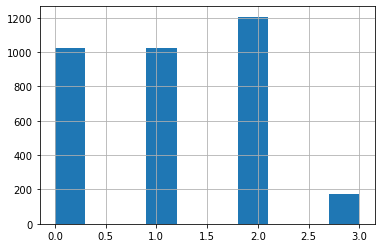

In [27]:
y.hist()

In [29]:
from imblearn.over_sampling import ADASYN
ada = ADASYN()
X_resampled, y_resampled = ada.fit_resample(X, y)


In [32]:
y_resampled.value_counts()

3    1211
2    1206
0    1178
1    1165
Name: 推薦類型, dtype: int64

In [34]:
from sklearn.ensemble import RandomForestClassifier
X_train, X_val, y_train, y_val = train_test_split(
   X_resampled, y_resampled, test_size=0.33, random_state=42)

In [37]:
randomForestModel = RandomForestClassifier(random_state = 42, n_estimators= 400)
randomForestModel.fit(X_train,y_train)
randomForestModel.score(X_val,y_val)

0.8421387651177594

In [39]:
####79.8
randomForestModel.fit(X_resampled,y_resampled)
y_pred = randomForestModel.predict(test)
y_pred_pd = pd.DataFrame(data = y_pred, columns = ["label"])
y_pred_pd = y_pred_pd.astype('int64').reset_index()
y_pred_pd
y_pred_pd.to_csv("e94084032.csv", index = False)

In [40]:
###79.8

<AxesSubplot:>

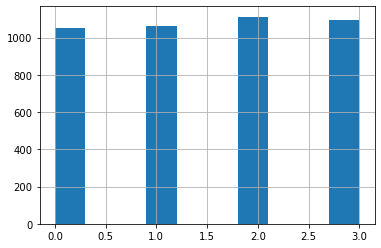

In [41]:
from imblearn.over_sampling import ADASYN
X_s, y_s = TomekLinks().fit_resample(X, y)
X_resampled, y_resampled =  ADASYN().fit_resample(X_s, y_s)
y_resampled.hist()

In [42]:
from sklearn.ensemble import RandomForestClassifier
X_train, X_val, y_train, y_val = train_test_split(
   X_resampled, y_resampled, test_size=0.33, random_state=42)

In [43]:
randomForestModel = RandomForestClassifier(random_state = 42, n_estimators= 400)
randomForestModel.fit(X_train,y_train)
randomForestModel.score(X_val,y_val)

0.8596491228070176

In [44]:
randomForestModel.fit(X_resampled,y_resampled)
y_pred = randomForestModel.predict(test)
y_pred_pd = pd.DataFrame(data = y_pred, columns = ["label"])
y_pred_pd = y_pred_pd.astype('int64').reset_index()
y_pred_pd
y_pred_pd.to_csv("e94084032.csv", index = False)

In [45]:
##79.6

<AxesSubplot:>

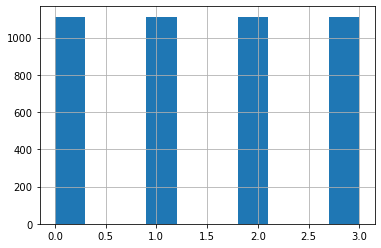

In [55]:
from imblearn.over_sampling import BorderlineSMOTE
X_s, y_s = TomekLinks().fit_resample(X, y)
X_resampled, y_resampled = BorderlineSMOTE(random_state = 0).fit_resample(X_s, y_s)
y_resampled.hist()

In [56]:
from sklearn.ensemble import RandomForestClassifier
X_train, X_val, y_train, y_val = train_test_split(
   X_resampled, y_resampled, test_size=0.33, random_state=42)
randomForestModel = RandomForestClassifier(random_state = 42, n_estimators= 400)
randomForestModel.fit(X_train,y_train)
randomForestModel.score(X_val,y_val)

0.8753405994550408

In [58]:
randomForestModel.fit(X_resampled,y_resampled)
y_pred = randomForestModel.predict(test)
y_pred_pd = pd.DataFrame(data = y_pred, columns = ["label"])
y_pred_pd = y_pred_pd.astype('int64').reset_index()
y_pred_pd
y_pred_pd.to_csv("e94084032.csv", index = False)

In [53]:
##79

In [59]:
from imblearn.under_sampling import AllKNN
allknn = AllKNN()
X_s, y_s = allknn.fit_resample(X, y)
X_resampled, y_resampled = SMOTE().fit_resample(X_s,y_s)

In [60]:
from sklearn.ensemble import RandomForestClassifier
X_train, X_val, y_train, y_val = train_test_split(
   X_resampled, y_resampled, test_size=0.33, random_state=42)
randomForestModel = RandomForestClassifier(random_state = 42, n_estimators= 400)
randomForestModel.fit(X_train,y_train)
randomForestModel.score(X_val,y_val)

0.9824561403508771

In [61]:
randomForestModel.fit(X_resampled,y_resampled)
y_pred = randomForestModel.predict(test)
y_pred_pd = pd.DataFrame(data = y_pred, columns = ["label"])
y_pred_pd = y_pred_pd.astype('int64').reset_index()
y_pred_pd
y_pred_pd.to_csv("e94084032.csv", index = False)

In [62]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
X_s, y_s = TomekLinks(sampling_strategy = 'all').fit_resample(X, y)
X_s, y_s = SMOTE(random_state = 0).fit_resample(X_s,y_s)

In [63]:
from sklearn.ensemble import RandomForestClassifier
X_train, X_val, y_train, y_val = train_test_split(
   X_s, y_s, test_size=0.33, random_state=42)
randomForestModel = RandomForestClassifier(random_state = 42, n_estimators= 400)
randomForestModel.fit(X_train,y_train)
randomForestModel.score(X_val,y_val)

0.8821525885558583

In [64]:
randomForestModel.fit(X_s,y_s)
y_pred = randomForestModel.predict(test)
y_pred_pd = pd.DataFrame(data = y_pred, columns = ["label"])
y_pred_pd = y_pred_pd.astype('int64').reset_index()
y_pred_pd
y_pred_pd.to_csv("e94084032.csv", index = False)

In [65]:
######Tomek + SMOTE Best